# Arabic Sentiment Analysis using Transformers (AraBERT)

## Project Overview
This project focuses on building a Natural Language Processing (NLP) pipeline to analyze the sentiment of Arabic tweets (Saudi Dialect and Modern Standard Arabic). Using Transfer Learning and the Hugging Face ecosystem, I developed a model capable of classifying text into Positive or Negative sentiments with high confidence.

## Key Features:
* Preprocessing: Custom Python functions to clean Arabic text (removing URLs, mentions, punctuations, and normalizing characters).
* Model: Leveraged a Pre-trained BERT-based model (AraBERT) for deep linguistic understanding.
* Visualization: Developed data visualizations using Matplotlib to present sentiment distribution clearly.
* Tools: Python, Google Colab, Hugging Face Transformers, Pandas.

## How to use:
1. Upload the Arabic tweets dataset (TSV format).
2. Run the preprocessing cell to clean the data.
3. Execute the pipeline cell to get predictions.

In [1]:
!pip install transformers[torch] datasets pandas scikit-learn

In [8]:
import pandas as pd

pos_df = pd.read_csv('train_Arabic_tweets_positive_20190413.tsv', sep='\t', header=None, names=['label', 'text'])
neg_df = pd.read_csv('train_Arabic_tweets_negative_20190413.tsv', sep='\t', header=None, names=['label', 'text'])

pos_df['POSITIVE'] = 1
neg_df['NEGATIVE'] = 0
df = pd.concat([pos_df, neg_df], ignore_index=True)

print(df.sample(10))

      label                                               text  POSITIVE  \
15812   pos  الهلال ينتصر .. لكنه بعيد جدا عن مستواه ! إهدا...       1.0   
22440   pos                                ريتك تسلمي عمو مايا       1.0   
21782   pos  [ 📊 ] مراكز اغنية Boy With Luv بالتعاون مع هال...       1.0   
11966   pos  عمانية وارثة ذهب قيمته مليون دولار ذهب حر ورثت...       1.0   
17993   pos       ما ودي اضحك لان اتحاد القدم ما يقول لهم لا 😂       1.0   
11258   pos                                         فععلا .. ✅       1.0   
5903    pos  صبحكم الله بالخير 💛 صورة قديمة صورته من قلعة ا...       1.0   
1632    pos  عقلي فيه شيء فجأة سمعت فلاي لايك ا بترفلاي بال...       1.0   
15531   pos                               انا بقول كفايه كده 🤣       1.0   
10322   pos     صباح الخير و المطر و الأجواء الجميلة 🙏 #الرياض       1.0   

       NEGATIVE  
15812       NaN  
22440       NaN  
21782       NaN  
11966       NaN  
17993       NaN  
11258       NaN  
5903        NaN  
1632        NaN  
1

In [9]:
import re

def clean_arabic_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[إأآ]', 'ا', text)
    return text.strip()

df['text'] = df['text'].apply(clean_arabic_text)

In [10]:
from transformers import pipeline

model_name = "UBC-NLP/MARBERT"
nlp_pipeline = pipeline("sentiment-analysis", model=model_name)

for i in range(5):
    text = df['text'][i]
    result = nlp_pipeline(text)
    print(f"Text: {text}")
    print(f"Result: {result}\n")

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: UBC-NLP/MARBERT
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.predictions.decoder.weight             | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
classifier.bias                            | MISSING    | 
classifier.weight                          | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on yo

Text: نحن الذين يتحول كل ما نود ان نقوله الى دعاء لله لا تبحثوا فينا عن قوة اننا مكسورون القوة التي
Result: [{'label': 'LABEL_1', 'score': 0.5193598866462708}]

Text: وفي النهاية لن يبقى معك احدالا من راى الجمال في روحك اماالمنبهرون بالمظا
Result: [{'label': 'LABEL_1', 'score': 0.5102846026420593}]

Text: من الخير نفسه
Result: [{'label': 'LABEL_1', 'score': 0.5149800777435303}]

Text: زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترضى بغير القمه مجرد ساعات لاستعادة الصداره الوصول الى القمه مهارة ت
Result: [{'label': 'LABEL_1', 'score': 0.5275205969810486}]

Text: الشيء الوحيد الذي وصلوا فيه للعالمية هو  المسيار   ترى كانوا يشجعون ريال مدريد ضد النصر
Result: [{'label': 'LABEL_1', 'score': 0.5039194226264954}]



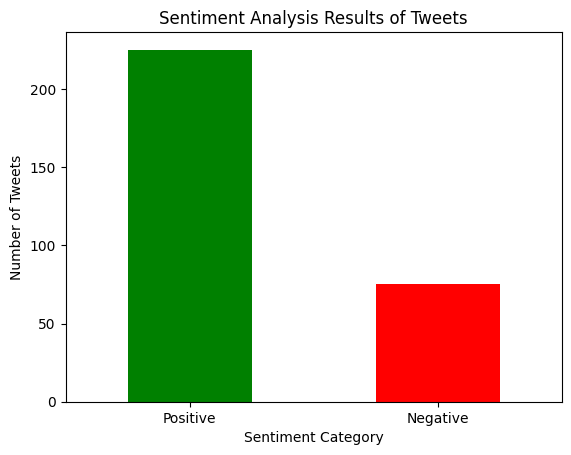

In [14]:
import matplotlib.pyplot as plt

results = []
for i in range(300):
    res = nlp_pipeline(df['text'][i])[0]
    results.append(res['label'])

results_clean = ['Positive' if r == 'LABEL_1' else 'Negative' for r in results]

pd.Series(results_clean).value_counts().plot(kind='bar', color=['green', 'red'])

plt.title('Sentiment Analysis Results of Tweets')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()